In [1]:
# pip install opencv-python
# !pip install tensorflow



In [1]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



In [2]:
img_array = cv2.imread(r'archive\test\happy\PrivateTest_647018.jpg')

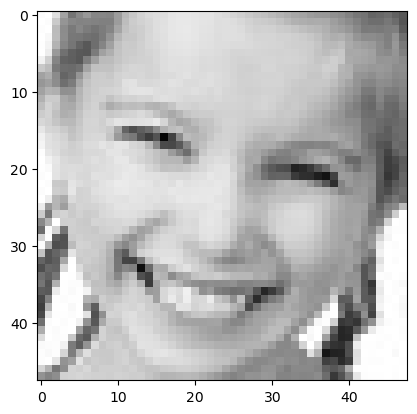

In [3]:
plt.imshow(img_array)

In [4]:
img_array.shape

(48, 48, 3)

In [5]:
Datadirectory = 'archive/train/'

In [6]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

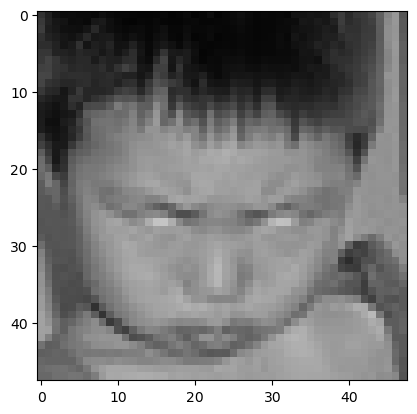

In [7]:
for category in classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

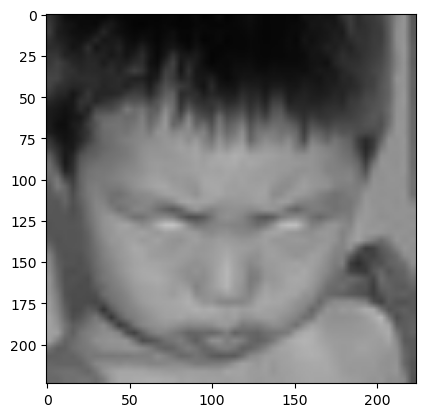

In [8]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
trainig_data = []
for category in classes:
    path = os.path.join(Datadirectory,category)
    class_num = classes.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(img_size,img_size))
            trainig_data.append([new_array,class_num])
        except Exception as e:
            pass
            

In [11]:
print(len(trainig_data))

28709


In [12]:
import random

random.shuffle(trainig_data)

In [13]:
x = []
y = []

for features,label in trainig_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1,img_size,img_size,3)#converting into 4 dimension

In [14]:
x.shape

(28709, 224, 224, 3)

In [15]:
type(y)

list

In [16]:
y = np.array(y)

In [17]:
y

array([4, 3, 4, ..., 5, 3, 4])

# deep learning model

In [25]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2

In [30]:
model = MobileNetV2()

In [31]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

# Transfer Learning - tuning

In [32]:
base_input = model.layers[0].input

In [33]:
base_output = model.layers[-2].output

In [34]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [35]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [36]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [41]:
new_model =keras.Model(inputs = base_input,outputs = final_output)

In [43]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [44]:
new_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [45]:
new_model.fit(x,y,epochs=25)

Epoch 1/25


898/898 [==============================] - 2072s 2s/step - loss: 1.2525 - accuracy: 0.5230
Epoch 2/25
898/898 [==============================] - 1978s 2s/step - loss: 1.0833 - accuracy: 0.5925
Epoch 3/25
898/898 [==============================] - 1953s 2s/step - loss: 1.0012 - accuracy: 0.6283
Epoch 4/25
898/898 [==============================] - 1763s 2s/step - loss: 0.9419 - accuracy: 0.6501
Epoch 5/25
898/898 [==============================] - 1619s 2s/step - loss: 0.8885 - accuracy: 0.6705
Epoch 6/25
898/898 [==============================] - 1609s 2s/step - loss: 0.8361 - accuracy: 0.6925
Epoch 7/25
898/898 [==============================] - 1808s 2s/step - loss: 0.7846 - accuracy: 0.7084
Epoch 8/25
898/898 [==============================] - 1934s 2s/step - loss: 0.7306 - accuracy: 0.7295
Epoch 9/25
898/898 [==============================] - 1938s 2s/step - loss: 0.6813 - accuracy: 0.7498
Epoch 10/25
898/898 [==============================] - 1629s 2s/step - loss: 0.6

In [2]:
frame = cv2.imread('happy.jfif')

In [3]:
frame.shape

(201, 251, 3)

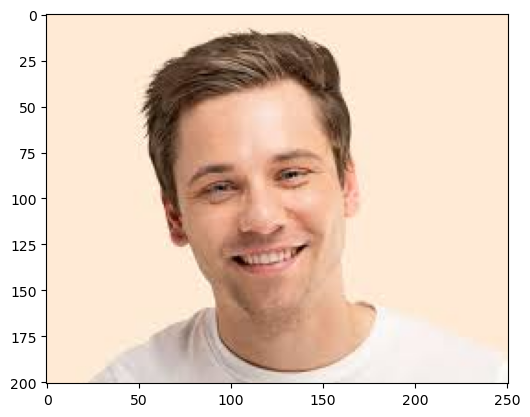

In [4]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_RGB2BGR))

In [5]:
facecasecade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [6]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [7]:
gray.shape

(201, 251)

In [8]:
faces = facecasecade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+h]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    faces = facecasecade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print('face not detected!!')
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]

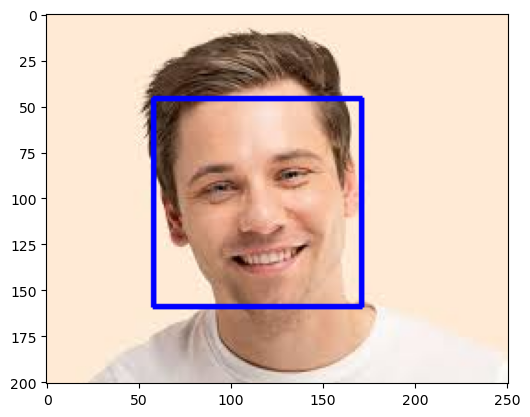

In [9]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

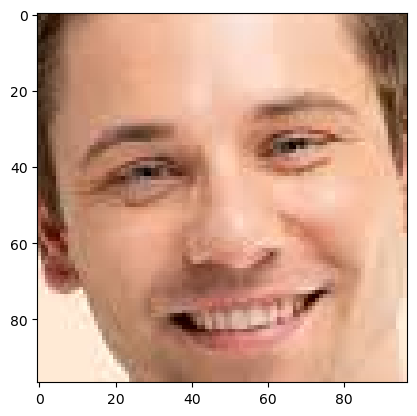

In [10]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [11]:
final_img = cv2.resize(face_roi,(224,224))
final_img = np.expand_dims(final_img,axis=0)
final_img = final_img/255

In [12]:
prediction = new_model.predict(final_img)

NameError: name 'new_model' is not defined

In [ ]:
prediction[0]

In [ ]:
np.argmax(prediction)

In [18]:
new_model.save('My_model.h5')

C:\Users\abdur\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
new_model = tf.keras.models.load_model('My_model.h5')

# real-time detection

In [21]:
import cv2

path='haarcascade_frontalface_default.xml'
font_scale=1.5
font = cv2.FONT_HERSHEY_PLAIN

# rectangle_bgr = (255,255,255)
# img = np.zeros((500,500))
# text = 'some text in a box'
# (text_width,text_height) = cv2.getTextSize(text,font,font_scale = font_scale,thickness=1)[0]
# text_offset_x = 10
# text_offset_y = img.shape[0]-25
# box_coords = ((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
# cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
# cv2.putText(img,text,(text_offset_x,text_offset_y),font,font_scale=font_scale,color=(0,0,0),thickness=1)


cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cannot open webcam')

while True:
    ret,frame = cap.read()
    facecascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = facecascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+h]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        faces = facecasecade.detectMultiScale(roi_gray)
        if len(faces)==0:
            print('face not detected!!')
        else:
            for (ex,ey,ew,eh) in faces:
                face_roi = roi_color[ey:ey+eh,ex:ex+ew]
                
    final_img = cv2.resize(face_roi,(224,224))
    final_img = np.expand_dims(final_img,axis=0)
    
    font = cv2.FONT_HERSHEY_PLAIN
    
    predictions = new_model.predict(final_img)
    
    if (np.argmax(predictions)==0):
        status = 'Angry'
        
        x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
#         cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    elif (np.argmax(predictions)==1):
        status = 'Disgust'
        
        x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
#         cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(predictions)==2):
        status = 'Fear'
        
        x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
#         cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
     
    elif (np.argmax(predictions)==3):
        status = 'Happy'
        
        x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
#         cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(predictions)==4):
        status = 'Neutral'
        
        x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
#         cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(predictions)==5):
        status = 'Sad'
        
        x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
#         cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    else:
        status = 'Surprise'
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    cv2.imshow("face emotion dectactor",frame)
    
    if cv2.waitKey(2)&0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 136ms/step
face not detected!!
1/1 [==============================] - 0s 90ms/step


# 